# Wczytujemy dane z pliku
### zbiór to prawdziwe ceny mieszkań w Poznaniu zescrappowane z portalu gratka 


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  


In [14]:
r = pd.read_csv('../ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

# Oglądamy wstępnie dane

In [4]:
r.columns

Index(['price', 'isNew', 'rooms', 'floor', 'location', 'sqrMetres'], dtype='object')

In [5]:
r.shape

(1674, 6)

In [6]:
r.location.value_counts()

Grunwald        303
Winogrady       217
Rataje          164
Jeżyce          138
Stare           128
Centrum         116
Nowe             92
Piątkowo         76
Wilda            75
Naramowice       69
Starołęka        45
Podolany         41
Łazarz           34
Dębiec           32
Górczyn          31
Sołacz           21
Głuszyna         13
Szczepankowo     12
Ogrody            8
Malta             7
Śródka            5
Winiary           5
Zawady            5
Chwaliszewo       4
Garbary           3
Świerczewo        3
Antoninek         3
Plewiska          3
Bonin             3
Żegrze            2
Dolna             2
Strzeszyn         2
Kopernika         1
Dąbrowskiego      1
Wilczak           1
Ławica            1
Piatkowo          1
Morasko           1
Nadolnik          1
Komandoria        1
Kobylepole        1
Smochowice        1
Komorniki         1
Suchy             1
Name: location, dtype: int64

In [7]:
r.dtypes

price        float64
isNew           bool
rooms          int64
floor          int64
location      object
sqrMetres      int64
dtype: object

## Dane (typy danych/zmienne w statystyce) na przykładach
### Cena, ilośc m. kw. = zmienna ilościowa ciągła 

Przestrzeń liczb rzeczywistych (albo podzbiór ciągły)

tak samo np. zarobki, długośc w metrach, waga


### Ilość pokoi, piętro = zmienna ilościowa dyskretna

możemy uporządkować, skończona ilość, 

można powiedzieć że 4 pokoje to dwa razy więcej niż 2 pokoje

np. ocena w skali 1-10 (co 1), ilość dzieci


### zmienna ilościowa porządkowa ( w tym zbiorze nie ma)

można uporządkować (np wykształcenie), ale nie możemy powiedzieć że coś jest ileś razy większe

np. wykształcenie wyższe nie jest 2 razy bardziej od wykształcenia średniego

### lokacja = zmienna jakościowa (kategoryczna)

nie możemy uporządkować (bo nie można powiedzieć że Stare Miasto jest przed Sołaczem)

tak samo płeć albo wyznawana religia

In [8]:
r.describe()

,price,rooms,floor,sqrMetres
count,1.674000e+03,1674.000000,1674.000000,1674.000000
mean,3.672813e+05,2.684588,2.989247,57.877539
std,1.639803e+05,0.775238,2.950053,23.091438
min,1.000000e+05,2.000000,0.000000,12.000000
25%,2.800625e+05,2.000000,1.000000,44.000000
50%,3.301275e+05,3.000000,2.000000,54.000000
75%,3.990000e+05,3.000000,4.000000,71.000000
max,2.700000e+06,7.000000,16.000000,196.000000


In [9]:
r.head()

,price,isNew,rooms,floor,location,sqrMetres
0,476118.0,False,3,1,Centrum,78
1,459531.0,False,3,2,Sołacz,62
2,411557.0,False,3,0,Sołacz,15
3,496416.0,False,4,0,Sołacz,14
4,406032.0,False,3,0,Sołacz,15


In [10]:
r['price'].head()

0    476118.0
1    459531.0
2    411557.0
3    496416.0
4    406032.0
Name: price, dtype: float64

In [11]:
print('min_price: ',r.price.min())
print('\nkwantyl rzedu 0.01 (percentyl) cen: ', r.price.quantile(0.01))
print('suma wszystkich cen: ', r.price.sum())

min_price:  100000.0

kwantyl rzedu 0.01 (percentyl) cen:  156085.0
suma wszystkich cen:  614828819.6700001


# To teraz spróbujmy je narysować

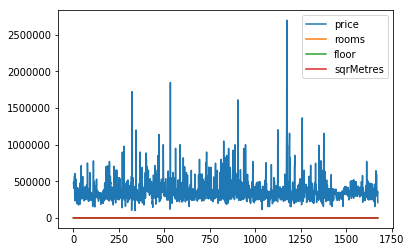

In [12]:
r.plot()

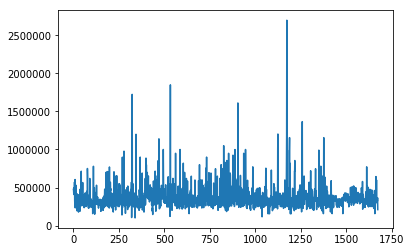

In [13]:
r['price'].plot()

## Te dane są w porządku losowym (więc powyższe wykresy są nieczytelne). Posortujmy je

In [14]:
r_sorted_by_price = r.sort_values(by=['price'])

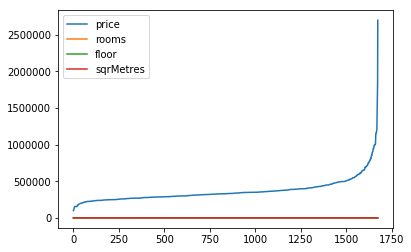

In [15]:
r_sorted_by_price.plot(use_index=False)

## Cena jest wysoka, możemy wziąć cenę w dziesiątkach tysięcy dla czytelności

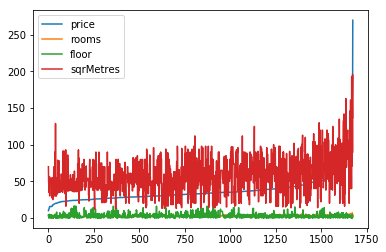

In [16]:
r_price_normalized = r_sorted_by_price.copy() # kopia przez wartość, a nie index
r_price_normalized['price'] = r_price_normalized['price'] / 10000 # dzielenie każdego wiersza przez 10000
r_price_normalized.plot(use_index=False)

## Nadal średnio to wygląda, bo danych jest zbyt dużo do ogarnięcia na raz, spróbujmy inaczej, po każdej cesze z osobna:

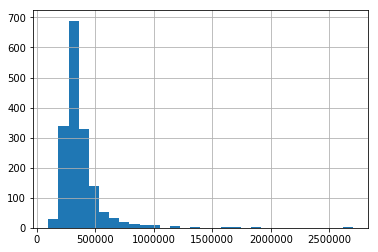

In [17]:
r.price.hist(bins=30) # histogram dla danych ciągłych (cena)
# oj, widać że jest parę mieszkań (mało) bardzo drogich

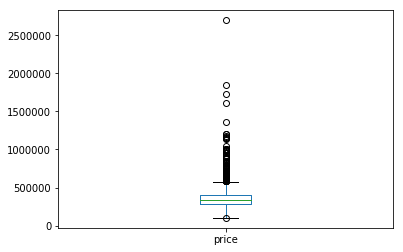

In [18]:
r.price.plot.box() # boxplot, jak widać mamy sporo odstających obserwacji!

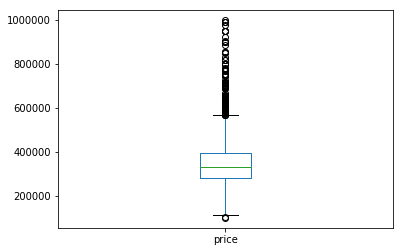

In [19]:
# Załóżmy, że chcemy się pozbyć obserwacji z cenami powyżej 99 percentyla:
r_price_cleared = r[r.price < r.price.quantile(0.99)]
r_price_cleared.price.plot.box() # tu już nie ma takiej rozbieżności

**Ćwiczenie**

Narysuj histogram cen mieszkań na podstawie df'a r_price_cleared

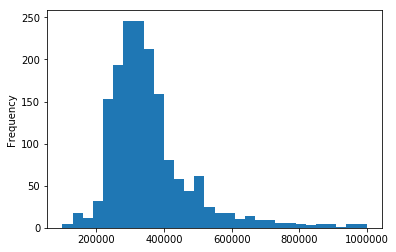

In [20]:
r_price_cleared.price.plot.hist(bins = 30)

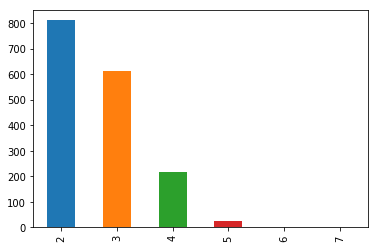

In [21]:
r.rooms.value_counts().plot.bar() # barplot dla danych dyskretnych (ilość pokoi)

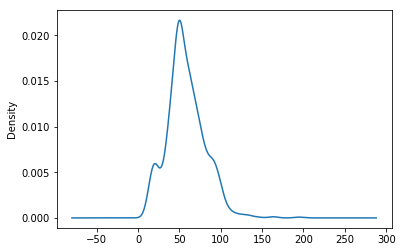

In [22]:
r.sqrMetres.plot.density()

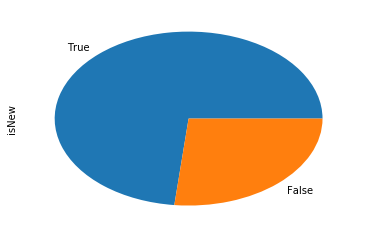

In [23]:
r.isNew.value_counts().plot.pie()

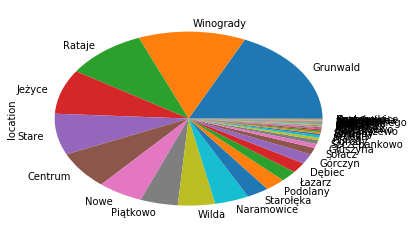

In [24]:
r.location.value_counts().plot.pie()

# Pobawmy się jeszcze samymi danymi dzięki pandasowi

In [25]:
r_price_sqrMetres = pd.DataFrame(r, columns=['price','sqrMetres']) # zrób data frame z 2 kolumn
r_price_sqrMetres.head()

,price,sqrMetres
0,476118.0,78
1,459531.0,62
2,411557.0,15
3,496416.0,14
4,406032.0,15


**Ćwiczenie**

Pokaż najtańsze mieszkanie.

In [26]:
r[r.price == r.price.min()]

,price,isNew,rooms,floor,location,sqrMetres
339,100000.0,True,3,4,Stare,70


**Ćwiczenie**

pokaż tylko mieszkania stare powyżej 1kk

In [27]:
r[(r.price > 1000000) & (r.isNew == False)] # pokaż tylko mieszkania stare powyżej 1kk

,price,isNew,rooms,floor,location,sqrMetres
344,1200000.0,False,5,0,Starołęka,193
1123,1007500.0,False,4,1,Starołęka,94
1124,1203616.0,False,5,0,Starołęka,71
1188,1156054.0,False,4,0,Stare,52
1376,1156054.0,False,4,0,Stare,52


In [28]:
r['price_in_thousands'] = (r['price'] / 1000).astype(int) # dodaj nową kolumnę
r['price_in_thousands'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands, dtype: int64

In [29]:
r['price_in_thousands2'] = r.price.apply(lambda x: int(x / 1000) ) # można tez tak
r['price_in_thousands2'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands2, dtype: int64

In [30]:
r['price_in_thousands3'] = r.price.map(lambda x: int(x / 1000) ) # albo tak
r['price_in_thousands3'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands3, dtype: int64

In [31]:
r_max_price = r.copy()
r_max_price.price = r_max_price.price.map(lambda x: 1000000 if x > 1000000 else x) 
# dla cen mieszkań powyżej 1kk zmień cenę na 1kk
r_max_price.price.max()

1000000.0

# Spróbujemy znaleźć jakies zależnosci i je zwizualizować (wizualizacja dzięki bibliotece seaborn)

**Ćwiczenie**

Do zmiennej r wczytaj zawartość pliku ceny_mieszkan_w_poznaniu.tsv

In [3]:
r = pd.read_csv('ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

NameError: name 'pd' is not defined

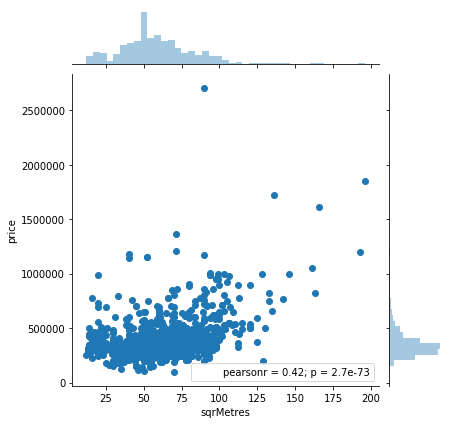

In [33]:
sns.jointplot(x = "sqrMetres", y = "price", data = r)

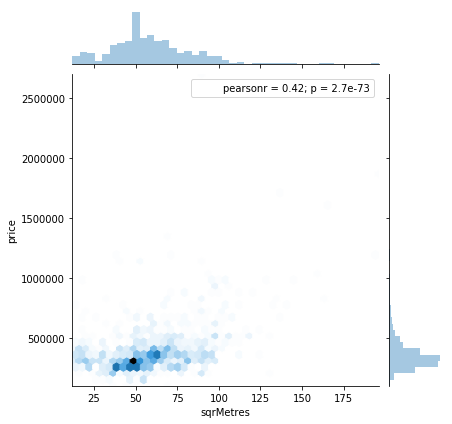

In [34]:
sns.jointplot("sqrMetres", "price", kind = "hex", data = r) # tak jest czytelniej

In [35]:
r.corr() # sprawdźmy korelację liniową cech
# widać że np ilość metrów jest skorelowana dodatnio z ceną
# potwierdza to, co widzimy na wykresach

,price,isNew,rooms,floor,sqrMetres
price,1.000000,0.034873,0.508833,-0.068882,0.422073
isNew,0.034873,1.000000,0.008730,-0.062179,0.083835
rooms,0.508833,0.008730,1.000000,-0.078585,0.377587
floor,-0.068882,-0.062179,-0.078585,1.000000,-0.055053
sqrMetres,0.422073,0.083835,0.377587,-0.055053,1.000000


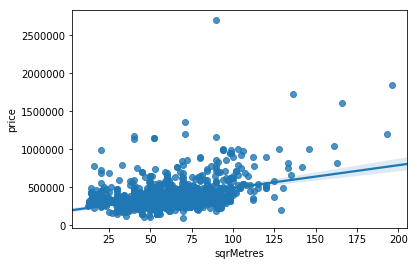

In [36]:
sns.regplot(r.sqrMetres, r.price) # rzeczywiście - im więcej metrów kw. tym większa cena

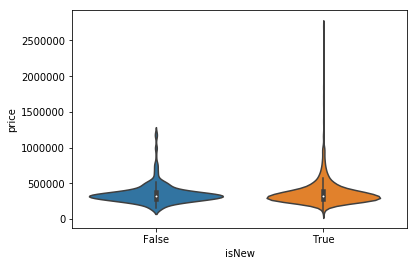

In [37]:
sns.violinplot(x = "isNew", y = "price", data = r) # 

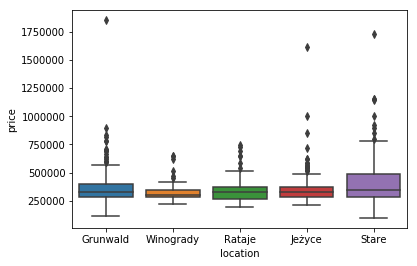

In [38]:
# ceny w zależności od lokacji (dla 5 najbardziej popularnych)
popular_locations = r.location.value_counts().head(5)
r_popular_locations = r[r.location.isin(popular_locations.keys())]
sns.boxplot(x = "location", y = "price", data = r_popular_locations) 

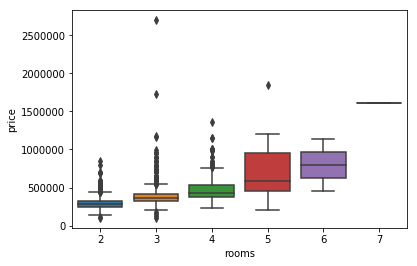

In [39]:
sns.boxplot(x="rooms", y = "price", data = r) # nim więcej pokoi tym cena większa

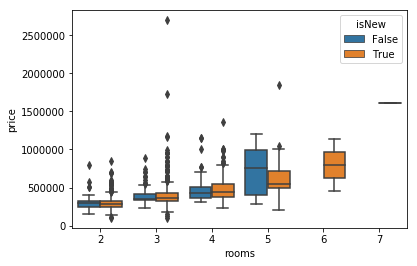

In [40]:
sns.boxplot(x="rooms", y = "price", hue = "isNew", data = r) # nim więcej pokoi tym cena większa

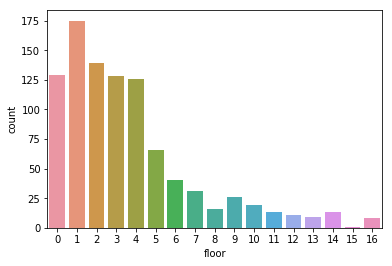

In [41]:
sns.countplot(x = "floor", data = r_popular_locations) # ten barplot jest bardziej kolorowy niż ten z pandasa :)

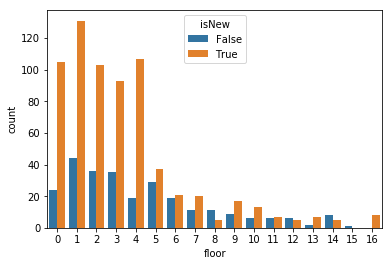

In [42]:
sns.countplot(x = "floor", hue = "isNew", data = r_popular_locations)

In [6]:
r

,price,isNew,rooms,floor,location,sqrMetres
0,476118.00,False,3,1,Centrum,78
1,459531.00,False,3,2,Sołacz,62
2,411557.00,False,3,0,Sołacz,15
3,496416.00,False,4,0,Sołacz,14
4,406032.00,False,3,0,Sołacz,15
5,450026.00,False,3,1,Naramowice,80
6,571229.15,False,2,4,Wilda,39
7,325000.00,False,3,1,Grunwald,54
8,268229.00,False,2,1,Grunwald,90
9,604836.00,False,4,5,Grunwald,40


**Ćwiczenie**

Przy wykorzystaniu dostępnych w sklearn modeli stwórz model predykcji ceny o najmniejszym RMSE.

In [29]:
r = pd.read_csv('ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

In [6]:
r_copy = r.copy()
r_copy.price = r_copy.price.map(lambda x: 1000000 if x > 1000000 else x) 

In [7]:
train=r_copy.sample(frac=0.8,random_state=200)
test=r_copy.drop(train.index)

In [20]:
# czy piętro to dobra cecha do zastosowania w modelu "z pudełka"
features = ["sqrMetres","isNew"]
label = ["price"]

X_train = train[features]
y_train = train[label]

X_test = test[features]
y_test = test[label]

In [21]:
import math
from sklearn.metrics import mean_squared_error, r2_score

def print_rmse(y, y_pred, label):
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    print("Mean squared error {}: {:.2f}".format(label, rmse))

In [22]:
# use average price as a prediction model
prediction = train['price'].mean()
y_predict_test = pd.DataFrame(prediction, index=np.arange(len(y_test)), columns=["price"])
y_predict_train = pd.DataFrame(prediction, index=np.arange(len(y_train)), columns=["price"])

print_rmse(y_train, y_predict_train, "train")
print_rmse(y_test, y_predict_test, "test")

Mean squared error train: 139803.54
Mean squared error test: 144112.41


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression().fit(X_train, y_train)
y_predict_test = lr.predict(X_test)
y_predict_train = lr.predict(X_train)

print_rmse(y_train, y_predict_train, "train")
print_rmse(y_test, y_predict_test, "test")

Mean squared error train: 125574.55
Mean squared error test: 132583.19


In [24]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
y_predict_test = dtr.predict(X_test)
y_predict_train = dtr.predict(X_train)

print_rmse(y_train, y_predict_train, "train")
print_rmse(y_test, y_predict_test, "test")

Mean squared error train: 99491.68
Mean squared error test: 129044.37


In [25]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(X_train, y_train)
y_predict_test = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

print_rmse(y_train, y_predict_train, "train")
print_rmse(y_test, y_predict_test, "test")

Mean squared error train: 143243.96
Mean squared error test: 147271.96


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
